# Activaton Learning Analysis Using Sin Function

In [123]:
import numpy as np
import requests, gzip, os, hashlib
import matplotlib.pyplot as plt
from numpy.random import seed
seed(1)

In [124]:
path="./mnist-v-8/mnist_data/"

## Fetching the MNIST data

In [125]:
#fetch data
# path='./mnist-v-8/'
def fetch(url):
    fp = os.path.join(path, hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp):
        with open(fp, "rb") as f:
            data = f.read()
    else:
        with open(fp, "wb") as f:
            data = requests.get(url).content
            f.write(data)
    return np.frombuffer(gzip.decompress(data), dtype=np.uint8).copy()

X = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28*28))
X_test1 = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28,28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

(28, 28)

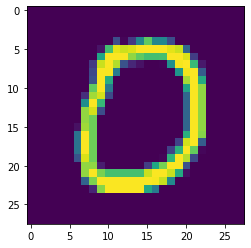

In [126]:
test=X_test1[10]
plt.imshow(test)
np.shape(test)

In [127]:
#Validation split
#Xtrain and val are images
#Ytrain and val are labels
rand=np.arange(60000)
np.random.shuffle(rand)
train_no=rand[:50000]

val_no=np.setdiff1d(rand,train_no)

X_train,X_val=X[train_no,:,:],X[val_no,:,:]
Y_train,Y_val=Y[train_no],Y[val_no]

Label of X_val[0] =  4


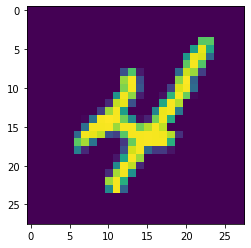

In [128]:
# X_val
plt.imshow(X_val[0])
print("Label of X_val[0] = ",Y_val[0])

Label of X_train[0]: 3


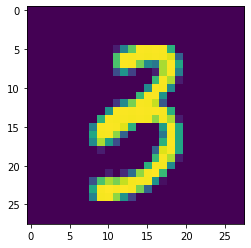

In [129]:
# X_train
X_train[0]
plt.imshow(X_train[0])
print("Label of X_train[0]:",Y_train[0])

In [130]:
#Sigmoid function
def sigmoid(x):
    return np.sin(x)   

#derivative of sigmoid
def d_sigmoid(x):
    return (np.cos(x) )

In [131]:
#Softmax function for final layer 
def softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)

#derivative of softmax
def d_softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))

In [132]:
def init(x,y):
    layer=np.random.uniform(-1.,1.,size=(x,y))/np.sqrt(x*y)
    return layer.astype(np.float32)

np.random.seed(42)
l1=init(28*28,128)
l2=init(128,10)

In [133]:
Y_train

array([3, 2, 7, ..., 2, 3, 3], dtype=uint8)

In [134]:
ex=np.array(Y_train[1]).reshape(1,1)
ex

array([[2]], dtype=uint8)

In [135]:
#Output will be in this form for Ytrain[1]=0
#example_out= [1,0,0,0,0,0,0,0,0,0]
example_out = np.zeros((len(ex),10), np.float32)
example_out[range(example_out.shape[0]),ex] = 1
example_out

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [136]:
#forward and backward pass
def forward_backward_pass(x,y):
    targets = np.zeros((len(y),10), np.float32)
    targets[range(targets.shape[0]),y] = 1
 
    
    x_l1=x.dot(l1)
    x_sigmoid=sigmoid(x_l1)
    x_l2=x_sigmoid.dot(l2)
    out=softmax(x_l2)
   
 
    error=2*(out-targets)/out.shape[0]*d_softmax(x_l2)
    update_l2=x_sigmoid.T@error
    
    
    error=((l2).dot(error.T)).T*d_sigmoid(x_l1)
    update_l1=x.T@error

    return out,update_l1,update_l2 


In [137]:

epochs=7000
lr=0.001
batch=128
losses,accuracies,val_accuracies=[],[],[]

for i in range(epochs):
    sample=np.random.randint(0,X_train.shape[0],size=(batch))
    x=X_train[sample].reshape((-1,28*28))
    y=Y_train[sample]
 

    out,update_l1,update_l2=forward_backward_pass(x,y)
  
    category=np.argmax(out,axis=1)
    accuracy=(category==y).mean()
    accuracies.append(accuracy)
    
    loss=((category-y)**2).mean()
    losses.append(loss.item())
    
    l1=l1-lr*update_l1
    l2=l2-lr*update_l2
    
    if(i%10==0):    
        X_val=X_val.reshape((-1,28*28))
        val_out=np.argmax(softmax(sigmoid(X_val.dot(l1)).dot(l2)),axis=1)
        val_acc=(val_out==Y_val).mean()
        val_accuracies.append(val_acc.item())
    if(i%100==0): 
        print(f'For {i}th epoch: train accuracy: {accuracy:.3f} | validation accuracy:{val_acc:.3f} | training loss:{loss:.3f}')
        
        


For 0th epoch: train accuracy: 0.117 | validation accuracy:0.097 | training loss:16.281
For 100th epoch: train accuracy: 0.211 | validation accuracy:0.184 | training loss:15.656
For 200th epoch: train accuracy: 0.211 | validation accuracy:0.214 | training loss:12.523
For 300th epoch: train accuracy: 0.234 | validation accuracy:0.229 | training loss:14.172
For 400th epoch: train accuracy: 0.227 | validation accuracy:0.244 | training loss:15.117
For 500th epoch: train accuracy: 0.281 | validation accuracy:0.256 | training loss:11.922
For 600th epoch: train accuracy: 0.258 | validation accuracy:0.274 | training loss:12.219
For 700th epoch: train accuracy: 0.273 | validation accuracy:0.286 | training loss:11.234
For 800th epoch: train accuracy: 0.336 | validation accuracy:0.302 | training loss:11.516
For 900th epoch: train accuracy: 0.320 | validation accuracy:0.320 | training loss:10.258
For 1000th epoch: train accuracy: 0.328 | validation accuracy:0.332 | training loss:12.406
For 1100th 

# # Accuraccies plot per epoch

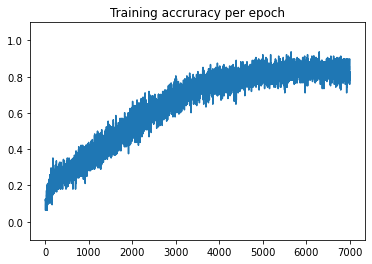

In [138]:
plt.title('Training accruracy per epoch')
plt.ylim(-0.1, 1.1)
plt.plot(accuracies)


# # validation accuracies per epoch

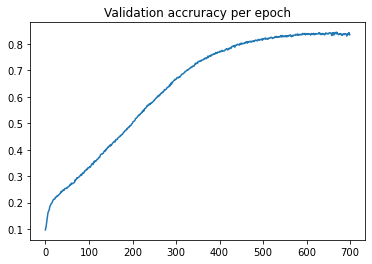

In [139]:
plt.title('Validation accruracy per epoch')

plt.plot(val_accuracies)

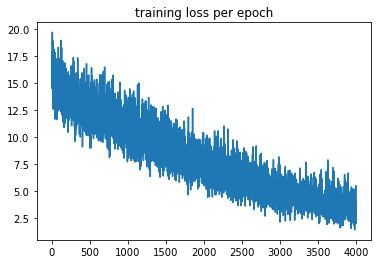

In [117]:
plt.title('training loss per epoch')

plt.plot(losses)

In [118]:
test_out=np.argmax(softmax(sigmoid(X_test.dot(l1)).dot(l2)),axis=1)
test_acc=(test_out==Y_test).mean().item()
print(f'Test accuracy = {test_acc*100:.2f}%')

Test accuracy = 76.94%


## Testing Xtest data and real time matrix number

### Real time matrix (7) number image

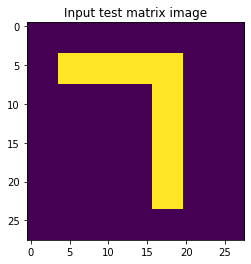

In [119]:
m = [[0,0,0,0,0,0,0],
     [0,10,10,10,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,0,0,0]]

m = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in m])
m=m.reshape(1,-1)
plt.title("Input test matrix image")
plt.imshow(m.reshape(28,28))

# m.shape

In [120]:
x2 = (sigmoid(m.dot(l1)).dot(l2))
x3=(np.argmax(x2))
# print(x2)
print("The input test number is classifed as :",x3)

The input test number is classifed as : 1


## Testing of Xtest image

array([4])

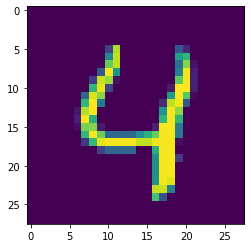

In [121]:
w=X_test1[4]
m = np.concatenate([np.concatenate([[x] for x in y]) for y in w])
m=m.reshape(1,-1)
plt.imshow(m.reshape(28,28))
x = np.argmax(sigmoid(m.dot(l1)).dot(l2),axis=1)
x

array([0])

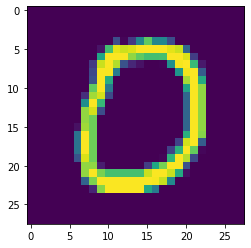

In [117]:
w=X_test1[10]
m = np.concatenate([np.concatenate([[x] for x in y]) for y in w])
m=m.reshape(1,-1)
plt.imshow(m.reshape(28,28))
x = np.argmax(sigmoid(m.dot(l1)).dot(l2),axis=1)
x